In [1]:
%pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [16,12]

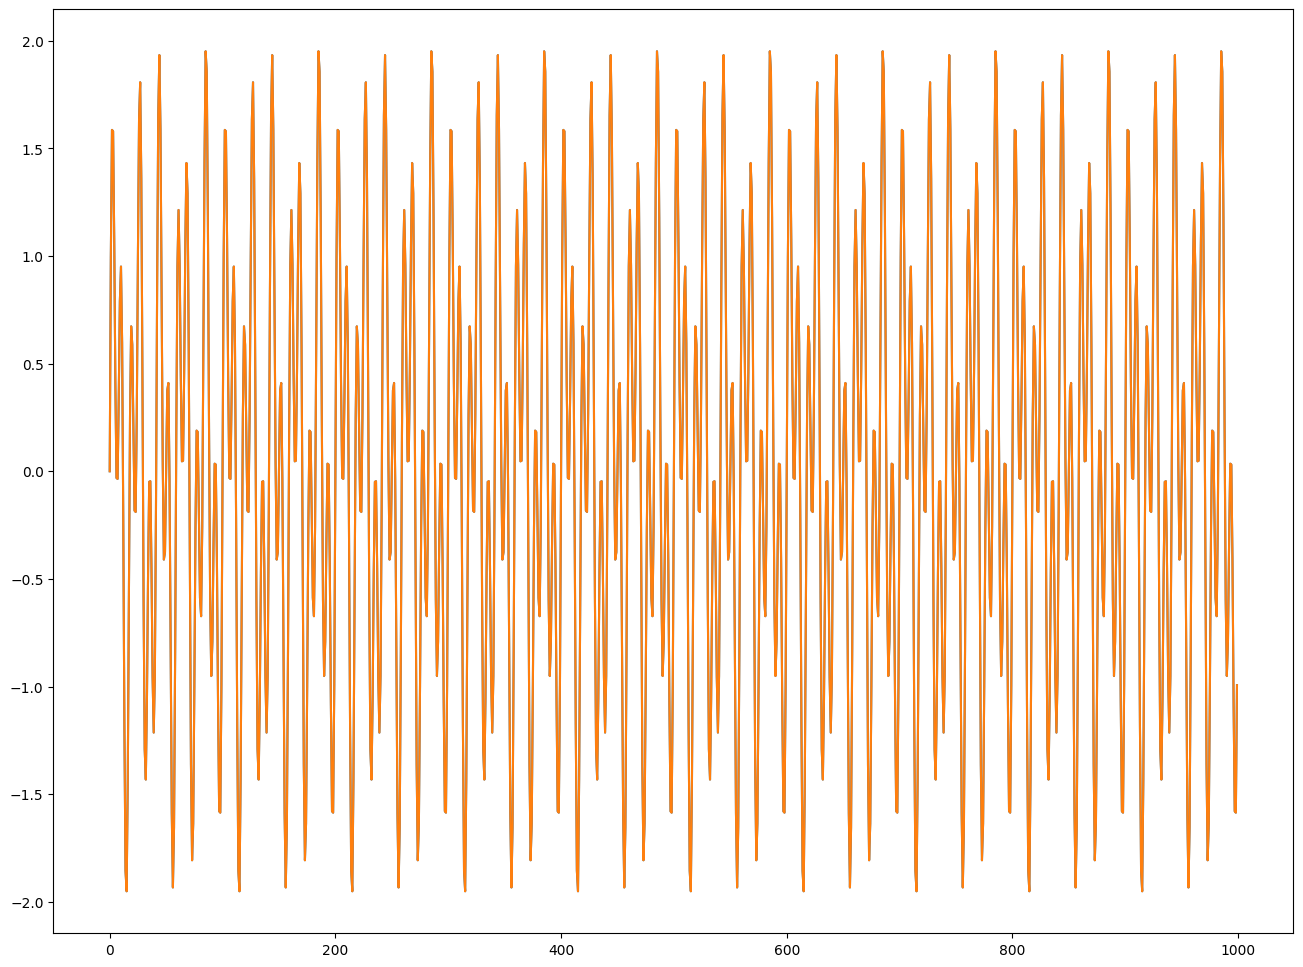

In [4]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
# f = f + 2.5*np.random.randn(len(t))
plt.plot(f)
plt.plot(f_clean)

In [5]:
n = len(t)
fhat = np.fft.fft(f, n)

In [6]:
PSD = fhat * np.conj(fhat) / n

In [7]:
freq = (1/(dt*n)) * np.arange(n)

In [8]:
L = np.arange(1,np.floor(n/2), dtype='int')

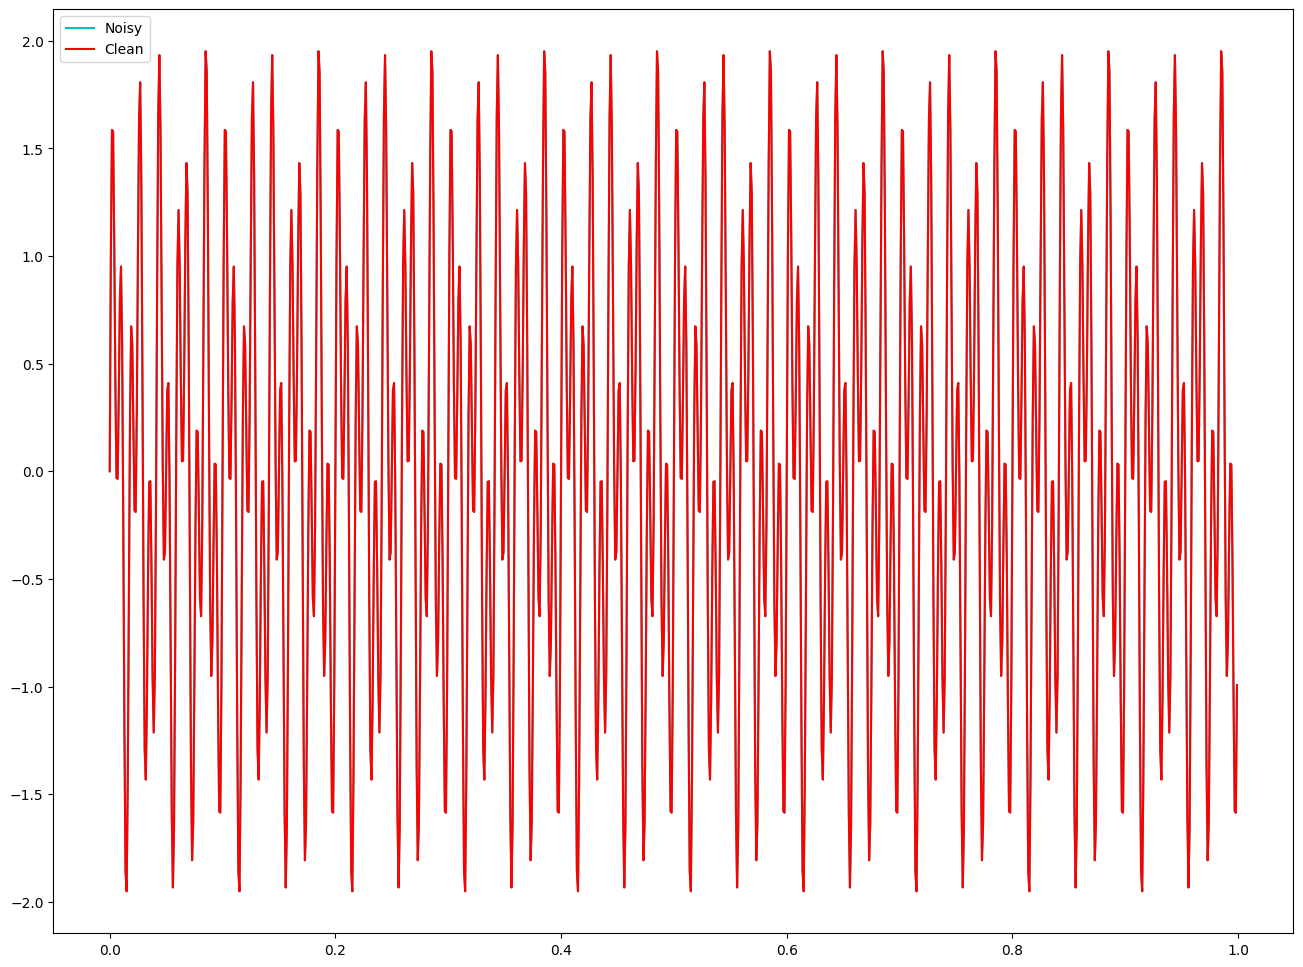

/home/daniel/Documents/Workspace/FourierTransformTest/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/daniel/Documents/Workspace/FourierTransformTest/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


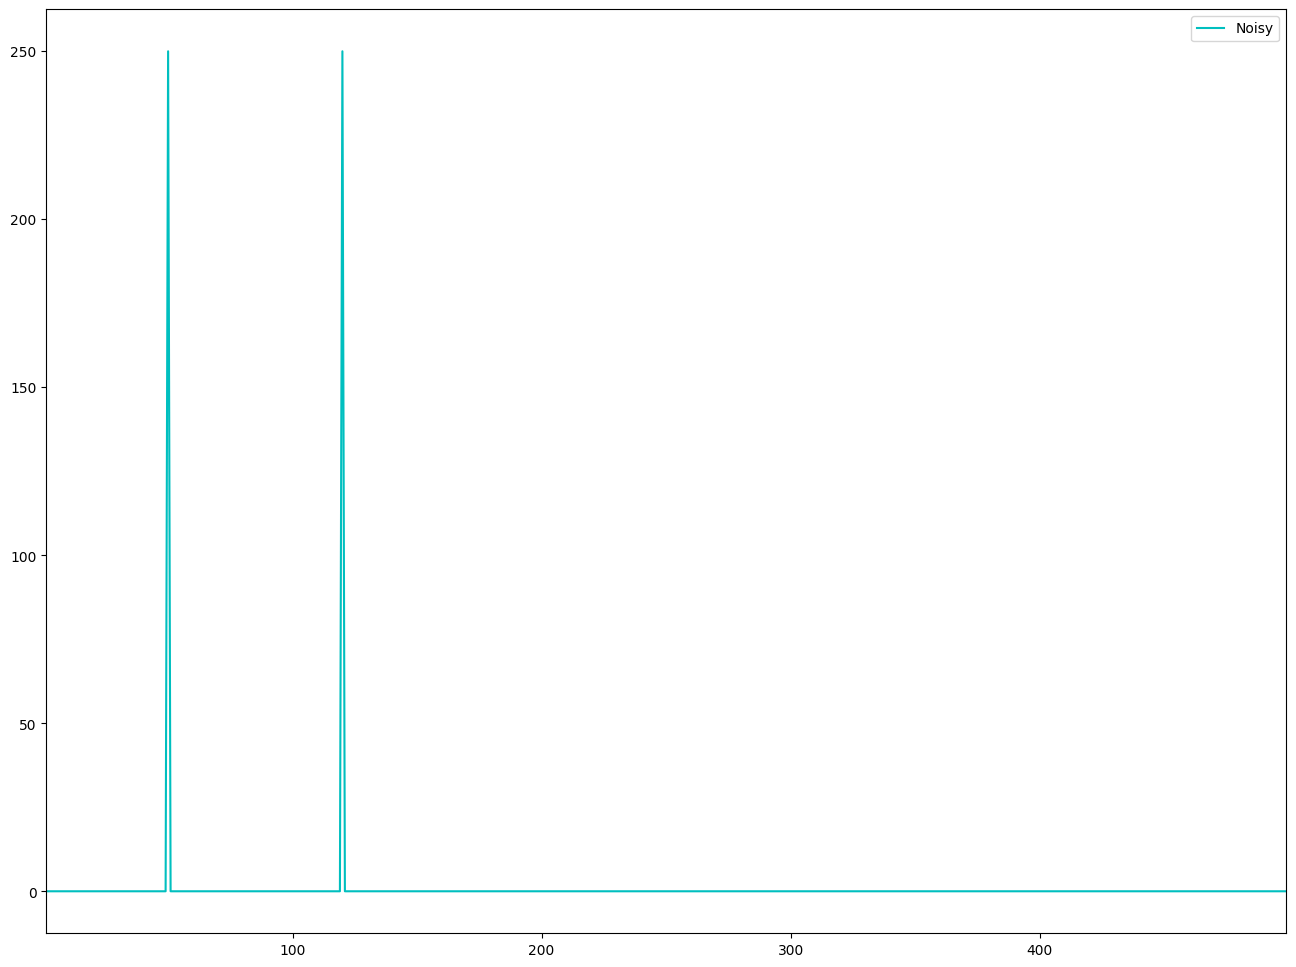

In [9]:
plt.plot(t,f,color='c',label='Noisy')
plt.plot(t,f_clean,color='r',label='Clean')
plt.legend()
plt.show()

plt.plot(freq[L],PSD[L],color='c',label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

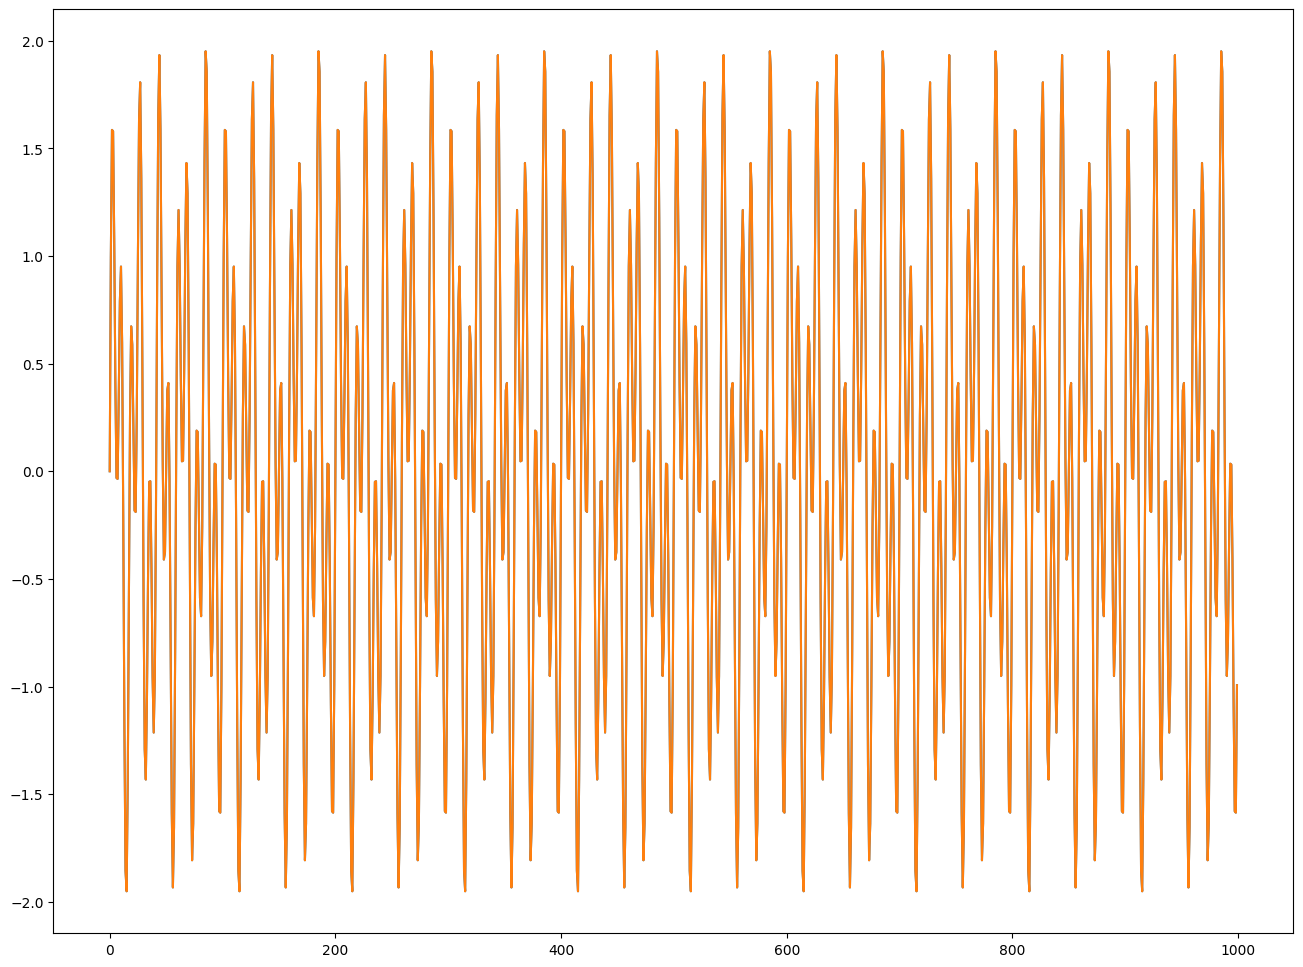

In [10]:
plt.plot(np.fft.ifft(fhat))
plt.plot(f_clean)
plt.show()

In [11]:
r = np.fft.ifft(fhat * (PSD > 100))
f2 = np.fft.fft(r, n)
PSD = np.sqrt(f2 * np.conj(f2))

/run/user/1000/ipykernel_8815/2572468602.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(freq, PSD * (PSD.astype(int) == 499))


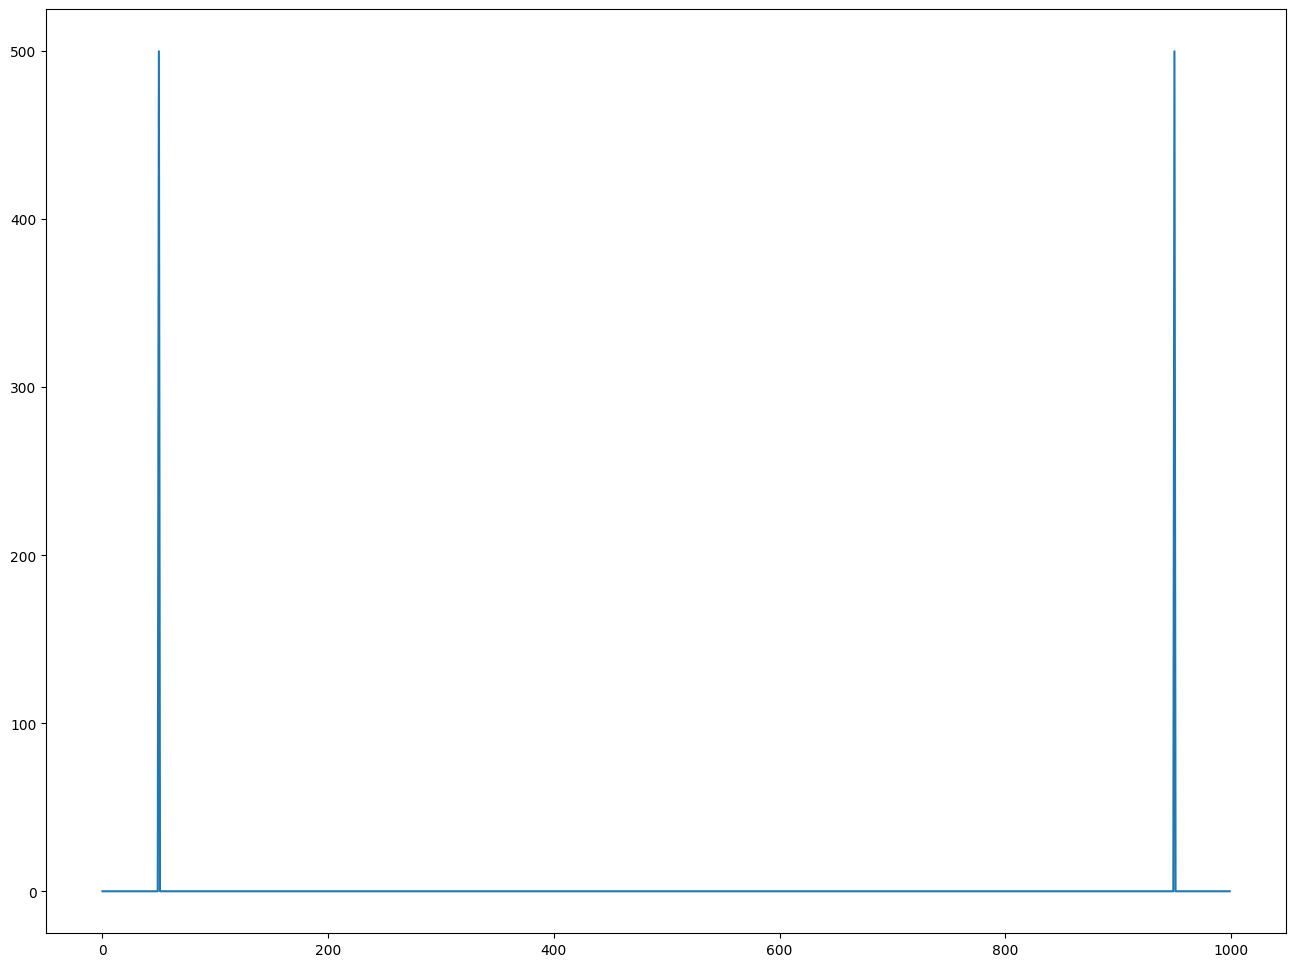

In [12]:
plt.plot(freq, PSD * (PSD.astype(int) == 499))

/run/user/1000/ipykernel_8815/660186705.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(np.fft.ifft(f2 * (PSD.astype(int) == 499)), label="denoised")


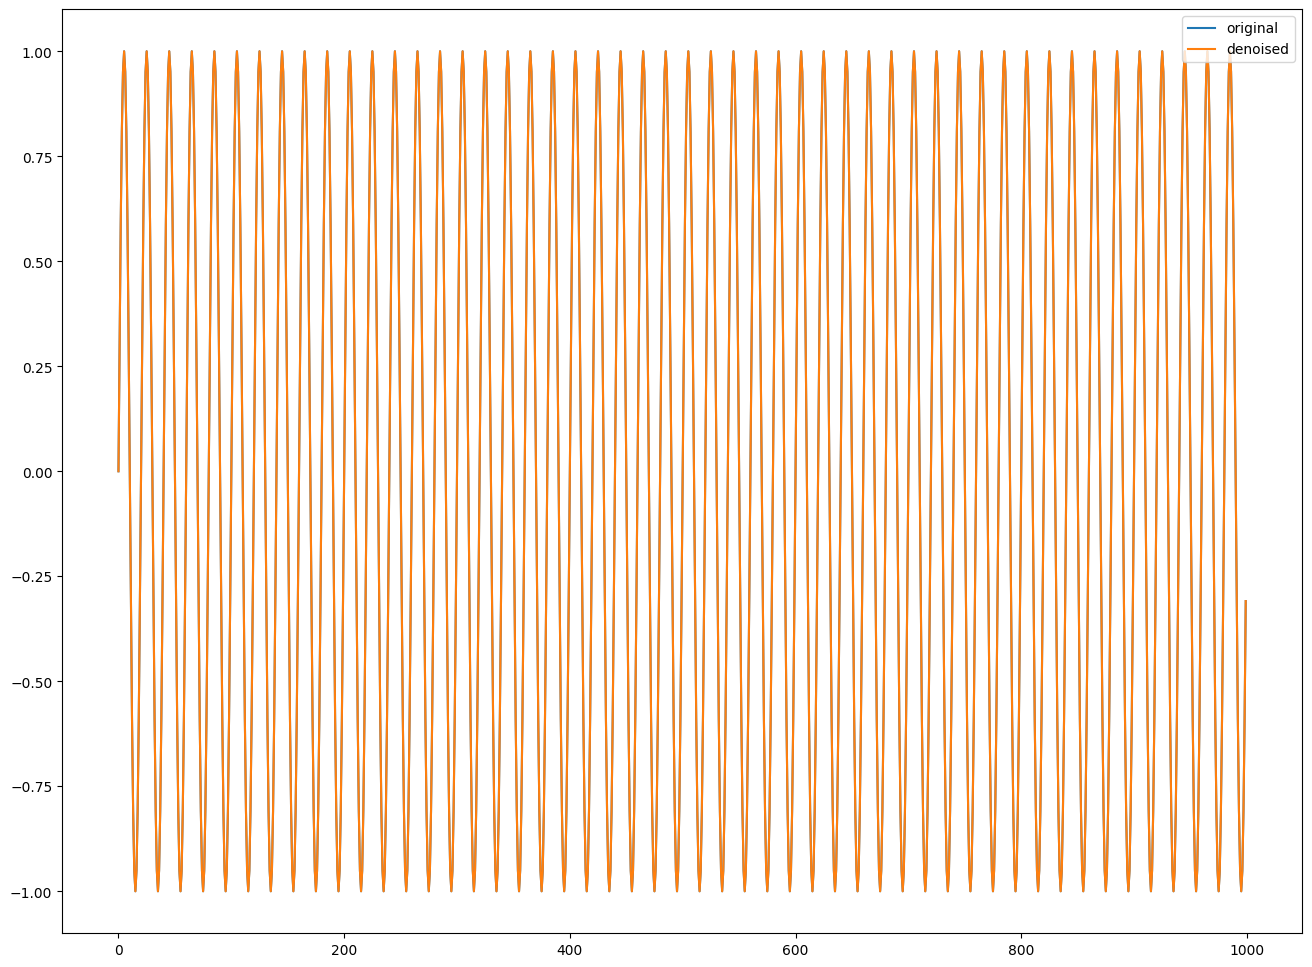

/run/user/1000/ipykernel_8815/660186705.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(np.fft.ifft(f2 * (PSD.astype(int) == 499)), label="denoised")


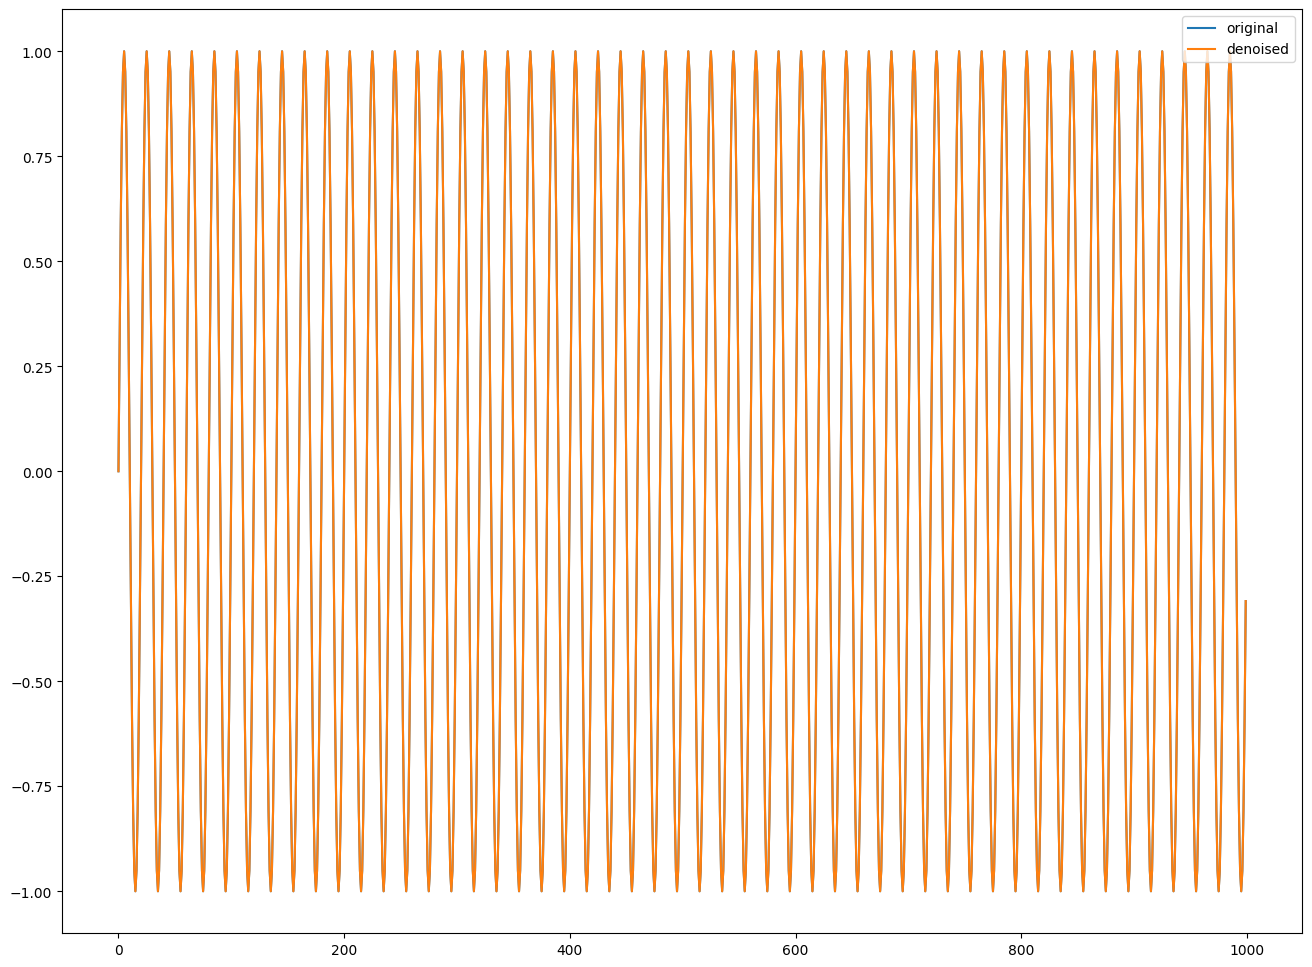

In [14]:
plt.plot(np.sin(2*np.pi*50*t), label="original")
plt.plot(np.fft.ifft(f2 * (PSD.astype(int) == 499)), label="denoised")
plt.legend()
plt.show()
plt.plot(np.sin(2*np.pi*50*t), label="original")
plt.plot(np.fft.ifft(f2 * (PSD.astype(int) == 499)), label="denoised")
plt.legend()
plt.show()

In [22]:
dat = np.fft.ifft(f2 * (PSD.astype(int) == 499)).real

/run/user/1000/ipykernel_8815/1721002490.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  dat = np.fft.ifft(f2 * (PSD.astype(int) == 499)).real


In [62]:
amplitude = np.abs(f2.max() / (len(f2) / 2))

In [33]:
freq = abs(f2.max().imag)

In [61]:
np.abs(f2.max() / (len(f2) / 2))

0.9999999999999998

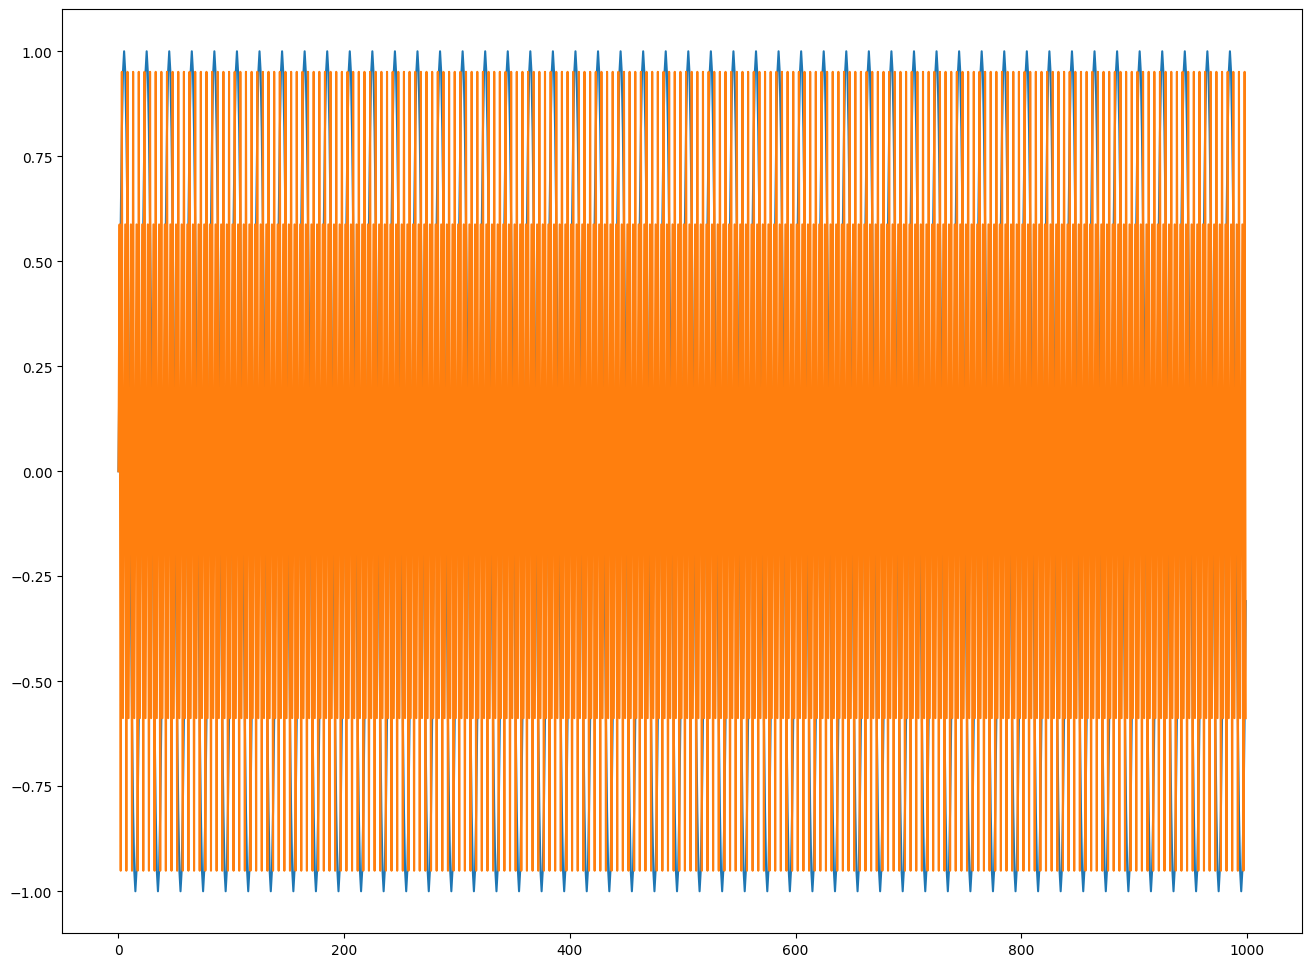

In [51]:
plt.plot(np.sin(2*np.pi*50*t), label="original")
plt.plot(amplitude*np.sin(400*2*np.pi*t), label="recreated")

Frequency of sine function: 4.994999999999999
Amplitude of sine function: 1.9989169658803534


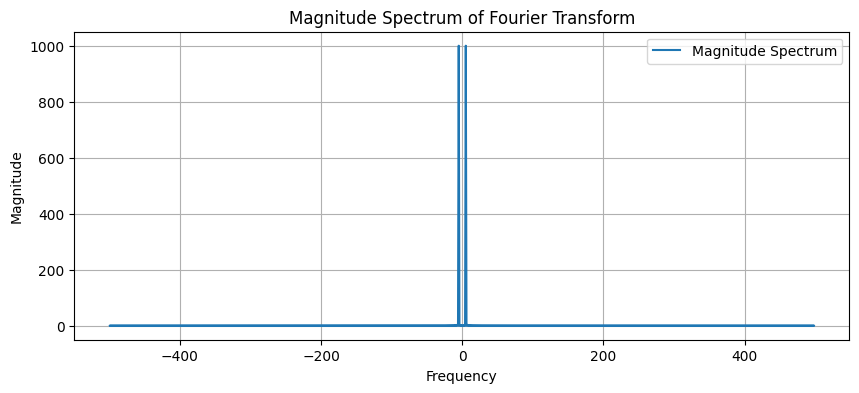

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Generate a sine function
t = np.linspace(0, 1, 1000)
frequency = 5  # Frequency of the sine function
amplitude = 2  # Amplitude of the sine function
sine_function = amplitude * np.sin(2 * np.pi * frequency * t)

# Perform Fourier Transform
fourier_transform = fft(sine_function)

# Find the frequency with the maximum magnitude
n = len(sine_function)
frequencies = np.fft.fftfreq(n, d=t[1]-t[0])
max_frequency_index = np.argmax(np.abs(fourier_transform))
dominant_frequency = frequencies[max_frequency_index]

# Amplitude of the sine function is half of the magnitude of the Fourier Transform at the dominant frequency
amplitude_sine = np.abs(fourier_transform[max_frequency_index]) / (n/2)

print("Frequency of sine function:", dominant_frequency)
print("Amplitude of sine function:", amplitude_sine)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies, np.abs(fourier_transform), label='Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Fourier Transform')
plt.legend()
plt.grid(True)
plt.show()